**Course:** CSIT553_03SP24 EXPLORATORY DATA ANALYSIS & VISUALIZATION

**Student:** Shibbir Ahmed Arif

**Project Group:** 08

# **Comprehensive Market Analysis of USA Fast Food Restaurants**

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Description**



**Fast Food Restaurants Across America**

This is a dataset of 10,000 fast food restaurants provided by Datafiniti's Business Database. The dataset includes the restaurant's address, city, latitude and longitude coordinates, name, and more. Data is collected from 2014 to 2019.

**Dataset Source:** https://data.world/datafiniti/fast-food-restaurants-across-america

# **Objective**

In this project, I chose the fast food industry for analysis, mainly focusing on the distribution of American fast food restaurants in various states/ provinces, and studied the openness of the market, analyzed the opportunity for new stores to get benefits, and provided some possible opening locations for new fast food restaurants to be open. I can consider this dataset to be representative of broader market and draw my conclusions.

# **Steps**


1.   Data Collection
2.   Import Necessary Libraries
3.   Data Load
4.   Data Exploration
5.   Data Cleaning
6.   Data Analysis
7.   Map Visualization
8.   Aggregation Visualization
9.   Interactive Visualization
10.  Conclusion



**Import Necessary Libraries**

In [ ]:
pip install folium

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import re
from folium.plugins import FastMarkerCluster
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Load The Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Datafiniti_Fast_Food_Restaurants_Jun19.csv")
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...


# **Data Exploration**

In [ ]:
df.shape

(10000, 16)

In [ ]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'sourceURLs', 'websites'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   dateAdded          10000 non-null  object 
 2   dateUpdated        10000 non-null  object 
 3   address            10000 non-null  object 
 4   categories         10000 non-null  object 
 5   primaryCategories  10000 non-null  object 
 6   city               10000 non-null  object 
 7   country            10000 non-null  object 
 8   keys               10000 non-null  object 
 9   latitude           10000 non-null  float64
 10  longitude          10000 non-null  float64
 11  name               10000 non-null  object 
 12  postalCode         10000 non-null  object 
 13  province           10000 non-null  object 
 14  sourceURLs         10000 non-null  object 
 15  websites           9918 non-null   object 
dtypes: float64(2), object(1

**Checking Missing Values**

In [ ]:
df.isnull().sum()

id              0
dateAdded       0
dateUpdated     0
address         0
categories      0
               ..
name            0
postalCode      0
province        0
sourceURLs      0
websites       82
Length: 16, dtype: int64

As we can see that there are some missing values in the dataset



**Checking Duplicate Values**

In [ ]:
df.duplicated().any()

False

As we can see the output is False, meaning there is no duplicate data in the dataset

# **Data Cleaning**

**Remove Unnecessary Columns**

In [ ]:
df.drop(columns=['id', 'dateAdded', 'dateUpdated','categories', 'primaryCategories', 'keys', 'sourceURLs', 'websites'], inplace=True)

In [ ]:
# shape of dataset
print("Dimension after dropping columns:")
print(df.shape)

df.head()

Dimension after dropping columns:
(10000, 8)


,address,city,country,latitude,longitude,name,postalCode,province
0,2555 11th Avenue,Greeley,US,40.39629,-104.69699,Carl's Jr.,80631,CO
1,2513 Highway 6 And 50,Grand Junction,US,39.08135,-108.58689,Del Taco,81505,CO
2,1125 Patterson Road,Grand Junction,US,39.09148,-108.55411,Which Wich,81506,CO
3,3455 N Salida Court,Aurora,US,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO
4,5225 E Colfax Avenue,Denver,US,39.74044,-104.92636,Taco Bell,80220,CO


**Summary Statistics**

In [ ]:
# Display summary statistics for numerical columns
summary_stats_numeric = df.describe()
print("Summary Statistics for Numerical Columns:")
print(summary_stats_numeric)

# Display summary statistics for categorical columns
summary_stats_categorical = df.describe(include='object')
print("\nSummary Statistics for Categorical Columns:")
print(summary_stats_categorical)

Summary Statistics for Numerical Columns:
           latitude     longitude
count  10000.000000  10000.000000
mean      37.298215    -93.284547
std        5.566995     16.421424
min       19.639560   -159.464310
25%       33.850652    -98.342758
50%       37.490189    -86.677452
75%       40.808905    -81.803061
max       64.856880    -71.082180

Summary Statistics for Categorical Columns:
              address      city country        name postalCode province
count           10000     10000   10000       10000      10000    10000
unique           9954      2810       1        1545       5310       47
top     2005 Kalia Rd  Columbus      US  McDonald's      37040       OH
freq                4       105   10000         765         17      922


In **Province** column, OH (Ohio) is the top value which shows occurrance 922 times.

In **City** column, Columbus is the top value which shows occurance 105 times.

In **Name** column, McDonald's is the top value which shows occurence 765 times.

# **Data Analysis**

**How many fast food restauraunts are recorded?**

In [ ]:
print("Number of unique restaurant:", df['name'].nunique())

Number of unique restaurant: 1545


**Which cities are crowded with fast food restaurants?**

Number of unique cities: 2810


Text(0, 0.5, 'count')

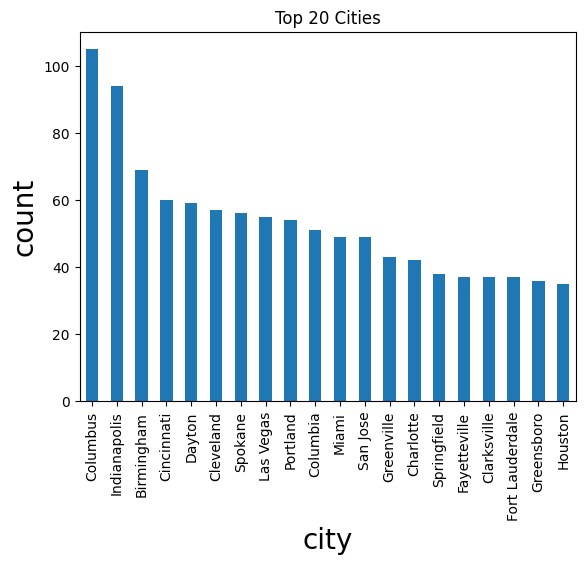

In [ ]:
print("Number of unique cities:", df['city'].nunique())
nameplot = df['city'].value_counts()[:20].plot.bar(title='Top 20 Cities')
nameplot.set_xlabel('city',size=20)
nameplot.set_ylabel('count',size=20)

Let's run pandas data . describe() function to see the min, max, and mean of number of fast food restaurants in different cities

In [ ]:
rest_count_by_city = df['city'].value_counts()
rest_count_by_city.describe()

count    2810.000000
mean        3.558719
std         6.260422
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       105.000000
Name: count, dtype: float64

**Many cities has only 1-3 restaurants opened and the mean number of restaurants opened is 3.55**

**How many cities have opened less than 4 fast food restaurants?**

In [ ]:
print(len(rest_count_by_city[rest_count_by_city < 4]), "cities opened less than 4 fast food restaurants")
print("They are", round(100*len(rest_count_by_city[rest_count_by_city < 4])/len(rest_count_by_city),2), "%"),
print("of the total cities recorded in the dataset")

2121 cities opened less than 4 fast food restaurants
They are 75.48 %
of the total cities recorded in the dataset


**1. The analysis of market openness and opportunities**

In [ ]:
# Group dataset by province and count the number of restaurants

df1 = df.groupby('province').size().reset_index(name='restaurant_count')
df1 = df1.sort_values(by='restaurant_count', ascending=False)
df1

,province,restaurant_count
33,OH,922
9,FL,739
4,CA,727
26,NC,663
1,AL,635
...,...,...
27,ND,18
7,DC,18
29,NJ,2
19,MA,2


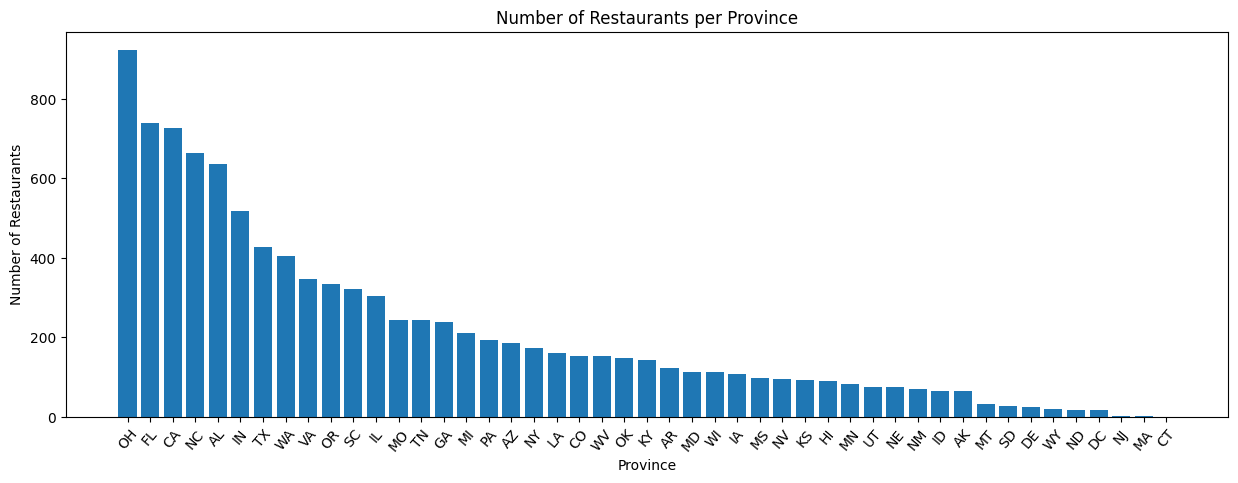

In [ ]:
# Create the bar chart
plt.figure(figsize=(15, 5))
plt.bar(df1['province'], df1['restaurant_count'])
plt.xticks(rotation=50)
plt.xlabel('Province')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants per Province')
plt.show()

# **Interactive Map Visualization 1**

**Finding out provinces with less than 100 and 50 restaurants**

In [ ]:
states_less_100 = df1[df1['restaurant_count'] < 100]
states_less_100

,province,restaurant_count
24,MS,99
31,NV,96
16,KS,92
11,HI,91
22,MN,83
...,...,...
27,ND,18
7,DC,18
29,NJ,2
19,MA,2


In [ ]:
states_less_50 = df1[df1['restaurant_count'] < 50]
states_less_50

,province,restaurant_count
25,MT,33
38,SD,27
8,DE,25
46,WY,20
27,ND,18
7,DC,18
29,NJ,2
19,MA,2
6,CT,1


In [ ]:
# Merge the two datasets
merged_df = pd.concat([states_less_50, states_less_100]).drop_duplicates()

# Plot the choropleth map
fig = px.choropleth(merged_df,
                     locations='province',
                     locationmode='USA-states',
                     scope='usa',
                     color='restaurant_count',
                     hover_name='province',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     range_color=(0, 100),
                     title='Provinces with Less Than 50 or 100 Restaurants',
                     labels={'restaurant_count': 'Restaurant Count'}
                    )

# Add slider for filtering less than 50 and less than 100 restaurants
fig.update_layout(
    sliders=[
        {
            'steps': [
                {'method': 'update', 'label': 'Less Than 50', 'args': [{'visible': [True]}, {'title': 'Provinces with Less Than 50 Restaurants'}]},
                {'method': 'update', 'label': 'Less Than 100', 'args': [{'visible': [True]}, {'title': 'Provinces with Less Than 100 Restaurants'}]}
            ]
        }
    ]
)

# Add click event to update map with selected province
fig.update_traces(marker_line_width=0.5, selector=dict(type='choropleth'))
fig.update_layout(clickmode='event+select')

fig.show()

**Observation:**
Select the above areas where the amount of stores is less than 50 or 100 for the development of new fast food stores, having a large relatively unopened market and being given more opportunities, reducing competition with strong competitors in bustling areas.

**Now, I will break up over 50 odd states into key regions to learn Brand strenghs at regional level. First lets take a closer look at dataset by plotting them on Map**

**2. Overview of Fast Food Restaurant Landscape**

**Lets obtain presence of restaurants at Regional level**

# **Interactive Map Visualization 2**

In [ ]:
lats = df['latitude'].tolist()
lons = df['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
FastMarkerCluster(data=locations).add_to(map1)
map1

**I see presence across all the states with Georgia, Indiana and Florida leading the way. Now lets split the entire market into 4 key regions**

In [ ]:
#split the entire market into 4 key regions
def market(x):

    if x in ('WA','OR','CA','NV','AZ','NM','CO','WY','MT','ID','AK','HI'):
        return "West"
    elif x in ('ND','MN','IA','SD','KS','NE','MO','WI','MI','IL','IN','OH'):
        return "Mid West"
    elif x in ('NY','NJ','PA','CT','RI','MA','ME','NH','VT'):
        return "North East"
    else:
        return "South"

df['region']=df['province'].apply(market)
df.head()

,address,city,country,latitude,longitude,name,postalCode,province,region
0,2555 11th Avenue,Greeley,US,40.39629,-104.69699,Carl's Jr.,80631,CO,West
1,2513 Highway 6 And 50,Grand Junction,US,39.08135,-108.58689,Del Taco,81505,CO,West
2,1125 Patterson Road,Grand Junction,US,39.09148,-108.55411,Which Wich,81506,CO,West
3,3455 N Salida Court,Aurora,US,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,West
4,5225 E Colfax Avenue,Denver,US,39.74044,-104.92636,Taco Bell,80220,CO,West


# **Interactive Aggregation Visualization 1**

In [ ]:
# Grouping by 'region' and 'province', and calculating the percentage of restaurants
d1 = df.groupby(['region', 'province']).agg({'name': 'count'}).reset_index()
d1['Total_Region'] = d1.groupby('region')['name'].transform('sum')
d1['Perc_Region'] = (d1['name'] / d1['Total_Region']) * 100
d1['Perc_Region'] = d1['Perc_Region'].round(1)

# Separate DataFrame for each region
d11 = d1[d1['region'] == 'West'].sort_values('Perc_Region', ascending=True)
d12 = d1[d1['region'] == 'Mid West'].sort_values('Perc_Region', ascending=True)
d13 = d1[d1['region'] == 'North East'].sort_values('Perc_Region', ascending=True)
d14 = d1[d1['region'] == 'South'].sort_values('Perc_Region', ascending=True)

# Bar chart
fig = px.bar(d1, x='province', y='Perc_Region', color='region',
             title="Fast Food Restaurant Presence (%): Percentages are at Regional Level and not Overall")
fig.update_layout(xaxis_title="State", yaxis_title="Percentage")
fig.show()

**Observation**
- In the West, California accounts for 32.4% of the total number of restaurants, and Washington and Oregon are still a long way off, accounting for about 18% and 14.9% respectively.

- Florida (15.8%) and North Carolina (14.2%) are the top two markets in the South, while Pennsylvania (52.2%) and New York (46.5%) lead the Northeast.

- In the Midwest, Ohio has the highest at about 34%.

**Now an overall view as well of fast food restaurants**

In [ ]:
state_counts = df.groupby(['province']).agg({'name':'count'})
state_counts.columns = ['Count of Brands']
state_counts.sort_values('Count of Brands',ascending=False,inplace=True)
state_counts.reset_index(inplace=True)

state_counts['Perc']=100*state_counts['Count of Brands']/state_counts['Count of Brands'].sum()

fig=px.bar(state_counts,x="province",y="Perc")
fig.update_traces(marker_color='Turquoise')
fig.update_layout(xaxis_title="State",yaxis_title="Percentage",title="Fast Food Restaurant Presence(%)")
fig.show()

**Observation**

- Ohio (9.2%), Florida (7.3%), California (7.2%), North Carolina (6.6%) and Alabama (6.3%) are top 5 markets in US
- Connecticut, Massachusetts, New Jersey, North Dakota rank least

**3. Analyze Brand Presence by Geographics**

# **Interactive Aggregation Visualization 2**

**Lets examine market share by Region**

In [ ]:
region_counts=df.groupby(['region']).agg({'name':'count'})
region_counts.columns=['Count of Brands']

region_counts.sort_values('Count of Brands', ascending=False,inplace=True)
region_counts['perc']=100*region_counts['Count of Brands']/region_counts['Count of Brands'].sum()
region_counts.reset_index(inplace=True)

fig=px.pie(region_counts,values='perc',names='region',title='Brand Presence by Region',width=600,height=500,
           color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

**Observation**

- With 46.7% of fast food restaurants located at South takes the top spot while North East contains only 3.72%.

- For Brands looking to enter the market or expand their footprint, South and Mid West are favourable.

# **Interactive Aggregation Visualization 3**

**Let's obtain an idea of top brands in the dataset**

In [ ]:
df['name']=df.name.str.replace('$','')
df['name']=df.name.str.replace("'",'')
df['name']=df.name.str.lower()
df['name']=df.name.map(lambda x: re.sub(r'\W+','',x))

Brand_1=df.groupby(['name']).agg({'name':'count'})
Brand_1.columns=['number']
Brand_1=Brand_1.sort_values('number',ascending=False)

Brand_1.nlargest(15,'number').index

Index(['subway', 'mcdonalds', 'tacobell', 'pizzahut', 'burgerking', 'kfc',
       'sonicdrivein', 'wendys', 'dominospizza', 'dairyqueen', 'arbys',
       'chickfila', 'jimmyjohns', 'panerabread', 'chipotlemexicangrill'],
      dtype='object', name='name')

**I am going to focus on top 7 brands only. I will filter out them from main dataset to inform my further analysis**

In [ ]:
Brands = ['mcdonalds', 'burgerking', 'tacobell', 'wendys', 'arbys', 'kfc','subway']

# Filter the DataFrame for the specified brands
df1 = df[df.name.isin(Brands)]

# Group by region and brand, and count the number of stores
d1 = df1.groupby(['region', 'name']).agg({'name':'count'})
d1.columns = ['Stores']
d1.reset_index(inplace=True)

# Sort the DataFrame by region and number of stores
d1.sort_values(['region', 'Stores'], ascending=[True, False], inplace=True)
d1.reset_index(drop=True, inplace=True)

# Plot
fig = px.scatter(d1, x="Stores", y="name", color="region",
                 title="Brand Presence by Region-Store Counts",
                 labels={"Stores": "Store Count"},
                 width=800, height=600
                )

fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20)
)
fig.show()

**Observation**

Subway, McDonalds, Taco Bell, KFC, Burger King, Wendys and Arbys are the most popular Brands. Clearly all the Brands have big presence in South followed by Mid West.

**Lets obtain Brand Penetration at Region to confirm the above view**

In [ ]:
d2 = d1.copy()

d2.set_index(['region', 'name'], inplace=True)

# Calculate the percentage of stores for each region
d2['Percentage'] = d2.groupby(level=0)['Stores'].transform(lambda x: 100 * x / x.sum())

# Reset index to convert the multi-index back to columns
d2.reset_index(inplace=True)

# Plot
fig2 = px.histogram(d2, x="region", y="Percentage", color="name",
                    title="Brand Presence by Region",
                    width=800, height=500)

fig2.show()

**Observation**

- Subway market penetration is above 28% in Mid West, South and West regions with highest of 31.6% in Mid West
- Burger King has higher penetration in North East after McDonalds and Subway.
- Taco Bell has concentrated more in West
- Arbys has least presence in West

# **Interactive Aggregation Visualization 4**

**Lets now obtain further granular insights of Brand Penetration by State level**

In [ ]:
d3 = df1.groupby(['province','name']).agg({'name':'count'})
d3.columns=['Stores']
d3['Percentage']=d3['Stores'].groupby(level=0).transform(lambda x:100*x/x.sum())
d3.reset_index(inplace=True)

fig4=px.histogram(d3,x="province",y="Percentage",color="name",
                 title="Brand Penetration by State")
fig4.show()

**Observation**

- Analyzing by state I learn the top markets for each brand. I observe that they are present in most of the markets.
- In Washington, D.C. only 2 brands are present
- For McDonalds, Washington, D.C., Hawaii and Arizona are key markets.
- Wendys is present in all states except Wincosin, South Dakota, Wyoming and Hawaii
- For Arbys, Wyoming and South Dakota are the key ones.
- KFC is absent in 4 states. They are - Kentucky, Montana, North Dakota and Wyoming

# **Conclusion**

**Market Landscape**

Most of the fast food restaurants are located in South and Mid West. Further in each of the four regions few states have higher market share than others by large margin. Apart from having large urban centers, favourable business environment may also be factor for ex: lower taxes, state grants in establishing new stores, less stringent labor laws etc

At National level, Ohio, Florida, California, North Carolina and Alabama are top states attracting most of the businesses

**Brand Presence**

Top Brands have presence in almost all geographies with Subway having more stores than others by a considerable margin. This tells us that key growth strategy for Brands has been "Market Development" i.e offer products/services in newer markets as a way to grow revenues
Subway share is above 28% in all regions followed by McDonald's at 20-28%.
Given the ubiquitous presence of brands, there is intense stiff competition in market. This creates added pressure on Brands to differentiate their product offerings which opens up opportunities for Brands to leverage their strengths while others face headwinds if they don't adapt in time. In market characterized by high volume-low margin transactions mere survival may not be best long term strategy